# Goal:  To Classify Stellar Objects [galaxy, star, qos [Quasi-Stellar Objects]

# Import libraries


In [2]:
import pandas as pd
import  pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

## Read the data

In [3]:
df = pd.read_csv('Skydata_pro.csv')
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237658e+18,122.472536,29.477546,18.80104,18.79409,19.17904,19.46893,19.62121,2830.0,301.0,1.0,82.0,5.011614e+18,STAR,0.000113,4451.0,55537.0,848.0
1,1.237661e+18,157.220491,38.044462,19.21634,17.36450,16.39222,15.96160,15.62490,3647.0,301.0,1.0,123.0,1.607801e+18,GALAXY,0.107083,1428.0,52998.0,56.0
2,1.237665e+18,128.426499,22.244187,17.58285,16.66683,16.37511,16.23573,16.03283,4517.0,301.0,2.0,113.0,2.171901e+18,GALAXY,0.024777,1929.0,53349.0,144.0
3,1.237655e+18,148.311910,3.603649,19.49339,18.02611,17.21924,16.73868,16.43414,2125.0,301.0,3.0,197.0,6.429279e+17,GALAXY,0.091564,571.0,52286.0,142.0
4,1.237649e+18,188.615906,0.966501,19.11787,18.80892,18.65386,18.43037,18.44886,752.0,301.0,6.0,301.0,3.266113e+17,QSO,1.528742,290.0,51941.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,1.237666e+18,53.104646,0.406206,19.56170,18.10295,17.53076,17.22465,17.07487,4849.0,301.0,4.0,809.0,4.673661e+17,GALAXY,0.022364,415.0,51810.0,428.0
104996,1.237667e+18,139.371132,21.871209,19.20145,17.67397,17.09594,16.88945,16.81790,5071.0,301.0,3.0,169.0,2.594136e+18,STAR,0.000077,2304.0,53762.0,227.0
104997,1.237658e+18,195.616433,50.155119,17.31194,16.21064,15.83690,15.70822,15.67614,2964.0,301.0,5.0,367.0,3.646903e+18,STAR,-0.000121,3239.0,54888.0,410.0
104998,1.237662e+18,185.585052,6.434501,18.73713,17.59770,17.01564,16.67914,16.42806,3841.0,301.0,1.0,138.0,1.830781e+18,GALAXY,0.074901,1626.0,53472.0,248.0


# Data analysis (EDA) and feature engineering 

## Data Profiling 
Data Profiling provides a Structure, Content and Relationship discovery of data. (It shows e.g. missing values, duplicate values, correlation in data, etc.)
To see the data discoveries you need to right click on dataprofile.html in your code editor and click on  "Copy Path" after that paste that path in your browser.

In [4]:
#data_profile = pandas_profiling.ProfileReport(df)

#data_profile.to_file("dataprofile.html")


## Visualization

In [5]:
#sns.pairplot(df)

## Removing null values and duplicate values from data frame
From data Profiling we come to know that total percentage of missing and duplicate date is 5%. Here no need to replace missing values because we can afford removing upto 5% of the data.
Otherwise, if the sum is greater than 5% in this case we have to replace missing values with mean, median or mode (depends on situation) can be used.

In [6]:
df.isnull().sum()

objid        471
ra           503
dec          514
u            453
g            498
r            536
i            506
z            518
run          508
rerun        539
camcol       496
field        476
specobjid    498
class          0
redshift     517
plate        510
mjd          503
fiberid      517
dtype: int64

## Remove the null values

In [7]:
df = df.dropna(how='any',axis=0) 


## Remove the duplicate values

In [8]:
df = df.drop_duplicates(keep='first')

## Dataframe after removing missing and null values

In [9]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237658e+18,122.472536,29.477546,18.80104,18.79409,19.17904,19.46893,19.62121,2830.0,301.0,1.0,82.0,5.011614e+18,STAR,0.000113,4451.0,55537.0,848.0
1,1.237661e+18,157.220491,38.044462,19.21634,17.36450,16.39222,15.96160,15.62490,3647.0,301.0,1.0,123.0,1.607801e+18,GALAXY,0.107083,1428.0,52998.0,56.0
2,1.237665e+18,128.426499,22.244187,17.58285,16.66683,16.37511,16.23573,16.03283,4517.0,301.0,2.0,113.0,2.171901e+18,GALAXY,0.024777,1929.0,53349.0,144.0
3,1.237655e+18,148.311910,3.603649,19.49339,18.02611,17.21924,16.73868,16.43414,2125.0,301.0,3.0,197.0,6.429279e+17,GALAXY,0.091564,571.0,52286.0,142.0
4,1.237649e+18,188.615906,0.966501,19.11787,18.80892,18.65386,18.43037,18.44886,752.0,301.0,6.0,301.0,3.266113e+17,QSO,1.528742,290.0,51941.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,1.237666e+18,53.104646,0.406206,19.56170,18.10295,17.53076,17.22465,17.07487,4849.0,301.0,4.0,809.0,4.673661e+17,GALAXY,0.022364,415.0,51810.0,428.0
104996,1.237667e+18,139.371132,21.871209,19.20145,17.67397,17.09594,16.88945,16.81790,5071.0,301.0,3.0,169.0,2.594136e+18,STAR,0.000077,2304.0,53762.0,227.0
104997,1.237658e+18,195.616433,50.155119,17.31194,16.21064,15.83690,15.70822,15.67614,2964.0,301.0,5.0,367.0,3.646903e+18,STAR,-0.000121,3239.0,54888.0,410.0
104998,1.237662e+18,185.585052,6.434501,18.73713,17.59770,17.01564,16.67914,16.42806,3841.0,301.0,1.0,138.0,1.830781e+18,GALAXY,0.074901,1626.0,53472.0,248.0


## Unique values in target and dataframe

In [10]:
print(df['class'].unique())

['STAR' 'GALAXY' 'QSO']


In [11]:
df.nunique()

objid         67951
ra            99998
dec           99998
u             79840
g             85895
r             87969
i             88623
z             89451
run             516
rerun             1
camcol            6
field           840
specobjid    100000
class             3
redshift      99298
plate          6117
mjd            2167
fiberid        1000
dtype: int64

## Remove insignificant column
Because this column "rerun" has only one unique value 

In [12]:
df = df.drop('rerun',axis=1) 

## Label encoding
Target column has categorical variables to handle that we have to use label encoding. (we can't use "One-Hot Encoding" because it will create more columns and for target we want only one column.) 

In [13]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'class'.
df['class']= label_encoder.fit_transform(df['class'])

In [14]:
df

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237658e+18,122.472536,29.477546,18.80104,18.79409,19.17904,19.46893,19.62121,2830.0,1.0,82.0,5.011614e+18,2,0.000113,4451.0,55537.0,848.0
1,1.237661e+18,157.220491,38.044462,19.21634,17.36450,16.39222,15.96160,15.62490,3647.0,1.0,123.0,1.607801e+18,0,0.107083,1428.0,52998.0,56.0
2,1.237665e+18,128.426499,22.244187,17.58285,16.66683,16.37511,16.23573,16.03283,4517.0,2.0,113.0,2.171901e+18,0,0.024777,1929.0,53349.0,144.0
3,1.237655e+18,148.311910,3.603649,19.49339,18.02611,17.21924,16.73868,16.43414,2125.0,3.0,197.0,6.429279e+17,0,0.091564,571.0,52286.0,142.0
4,1.237649e+18,188.615906,0.966501,19.11787,18.80892,18.65386,18.43037,18.44886,752.0,6.0,301.0,3.266113e+17,1,1.528742,290.0,51941.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,1.237666e+18,53.104646,0.406206,19.56170,18.10295,17.53076,17.22465,17.07487,4849.0,4.0,809.0,4.673661e+17,0,0.022364,415.0,51810.0,428.0
104996,1.237667e+18,139.371132,21.871209,19.20145,17.67397,17.09594,16.88945,16.81790,5071.0,3.0,169.0,2.594136e+18,2,0.000077,2304.0,53762.0,227.0
104997,1.237658e+18,195.616433,50.155119,17.31194,16.21064,15.83690,15.70822,15.67614,2964.0,5.0,367.0,3.646903e+18,2,-0.000121,3239.0,54888.0,410.0
104998,1.237662e+18,185.585052,6.434501,18.73713,17.59770,17.01564,16.67914,16.42806,3841.0,1.0,138.0,1.830781e+18,0,0.074901,1626.0,53472.0,248.0


## Feature Correlation
Here we can see  which features are highly correlated with target.

In [15]:
df.corr()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,1.000000,-0.064351,-0.055489,0.010553,0.018754,0.020594,0.024751,0.027222,1.000000,0.001595,-0.164873,0.366206,0.103581,0.025678,0.366206,0.414232,0.095430
ra,-0.064351,1.000000,0.076869,0.020903,0.017404,0.012410,0.006191,0.001267,-0.064350,-0.007632,0.021964,-0.056831,-0.061588,-0.006616,-0.056830,-0.030444,-0.027535
dec,-0.055489,0.076869,1.000000,-0.027315,-0.013263,-0.004657,-0.001074,0.004785,-0.055499,0.081407,-0.113244,0.017817,0.008314,0.011340,0.017817,0.026241,0.029428
u,0.010553,0.020903,-0.027315,1.000000,0.843252,0.692903,0.615987,0.562021,0.010552,0.006705,0.012013,0.008705,-0.207135,0.172663,0.008705,-0.011243,0.017322
g,0.018754,0.017404,-0.013263,0.843252,1.000000,0.956717,0.915003,0.886663,0.018753,0.011895,0.007629,0.147623,-0.033544,0.422311,0.147622,0.114511,0.068937
r,0.020594,0.012410,-0.004657,0.692903,0.956717,1.000000,0.976051,0.961456,0.020593,0.013450,0.002214,0.203246,0.098346,0.453376,0.203246,0.171312,0.085876
i,0.024751,0.006191,-0.001074,0.615987,0.915003,0.976051,1.000000,0.977189,0.024749,0.015305,-0.001310,0.236314,0.182071,0.449680,0.236314,0.207153,0.093089
z,0.027222,0.001267,0.004785,0.562021,0.886663,0.961456,0.977189,1.000000,0.027220,0.013702,-0.003809,0.251838,0.242773,0.440964,0.251837,0.226435,0.096774
run,1.000000,-0.064350,-0.055499,0.010552,0.018753,0.020593,0.024749,0.027220,1.000000,0.001476,-0.164865,0.366204,0.103579,0.025678,0.366205,0.414230,0.095397
camcol,0.001595,-0.007632,0.081407,0.006705,0.011895,0.013450,0.015305,0.013702,0.001476,1.000000,-0.076210,0.014343,0.012934,-0.000279,0.014337,0.020116,0.270671


##  correlations of each features in dataset with heat map

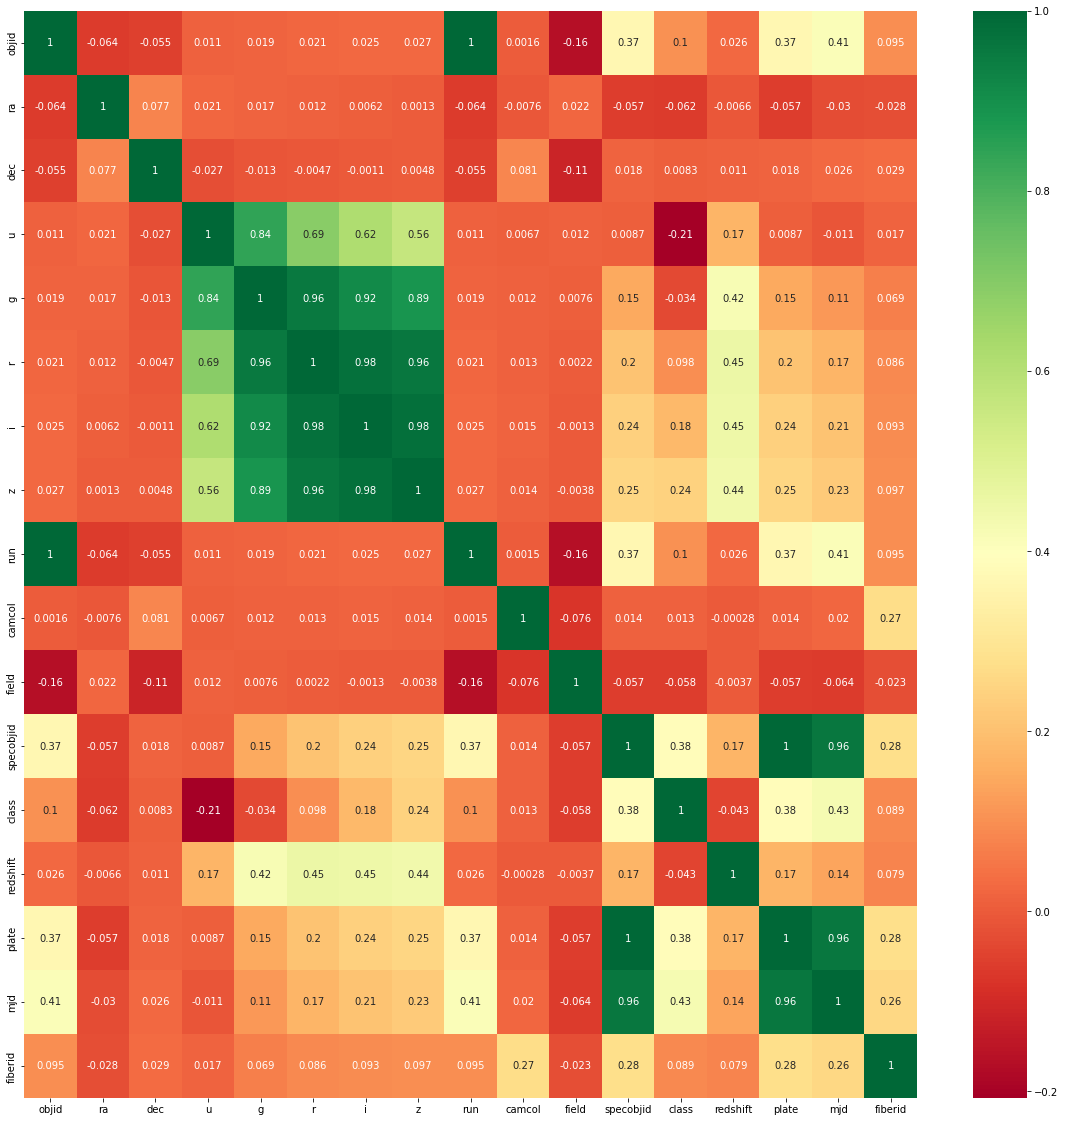

In [16]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Split the data into Inputs(X) and Target(y)

In [17]:
X = df.drop("class",axis=1)
y = df["class"]

## Inputs(X)

In [18]:
X

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1.237658e+18,122.472536,29.477546,18.80104,18.79409,19.17904,19.46893,19.62121,2830.0,1.0,82.0,5.011614e+18,0.000113,4451.0,55537.0,848.0
1,1.237661e+18,157.220491,38.044462,19.21634,17.36450,16.39222,15.96160,15.62490,3647.0,1.0,123.0,1.607801e+18,0.107083,1428.0,52998.0,56.0
2,1.237665e+18,128.426499,22.244187,17.58285,16.66683,16.37511,16.23573,16.03283,4517.0,2.0,113.0,2.171901e+18,0.024777,1929.0,53349.0,144.0
3,1.237655e+18,148.311910,3.603649,19.49339,18.02611,17.21924,16.73868,16.43414,2125.0,3.0,197.0,6.429279e+17,0.091564,571.0,52286.0,142.0
4,1.237649e+18,188.615906,0.966501,19.11787,18.80892,18.65386,18.43037,18.44886,752.0,6.0,301.0,3.266113e+17,1.528742,290.0,51941.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,1.237666e+18,53.104646,0.406206,19.56170,18.10295,17.53076,17.22465,17.07487,4849.0,4.0,809.0,4.673661e+17,0.022364,415.0,51810.0,428.0
104996,1.237667e+18,139.371132,21.871209,19.20145,17.67397,17.09594,16.88945,16.81790,5071.0,3.0,169.0,2.594136e+18,0.000077,2304.0,53762.0,227.0
104997,1.237658e+18,195.616433,50.155119,17.31194,16.21064,15.83690,15.70822,15.67614,2964.0,5.0,367.0,3.646903e+18,-0.000121,3239.0,54888.0,410.0
104998,1.237662e+18,185.585052,6.434501,18.73713,17.59770,17.01564,16.67914,16.42806,3841.0,1.0,138.0,1.830781e+18,0.074901,1626.0,53472.0,248.0


## Target(y)

In [19]:
y

0         2
1         0
2         0
3         0
4         1
         ..
104995    0
104996    2
104997    2
104998    0
104999    1
Name: class, Length: 100000, dtype: int32

## Feature Importance
It is a technique that calculates a score for all the input features of the model. The higher the score of the feature the more weightage is given that feature and fit accordingly in the model.

In [20]:
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [21]:
print(model.feature_importances_)

[0.02969511 0.05286718 0.0307413  0.0398704  0.05952025 0.0425548
 0.04947788 0.07326083 0.0300845  0.00692662 0.00988026 0.09256209
 0.29934974 0.09074212 0.08411759 0.00834933]


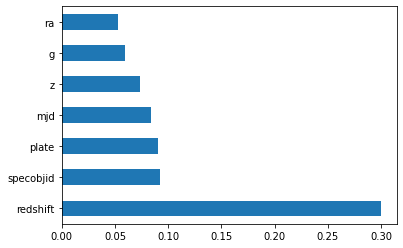

In [22]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

##  Modelling


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [25]:
model.fit(X_train, y_train)

RandomForestClassifier()

## Model Evaluation with accuracy_score, confusion_matrix and classification_report(precision, recall and f1-score)
Other techniques e.g. cross validation could be also used but there is no need because  the model is already performing very well.

In [26]:
y_predicted = model.predict(X_test)

### accuracy_score

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.9915333333333334

### confusion_matrix

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

Text(69.0, 0.5, 'y_test (Truth)')

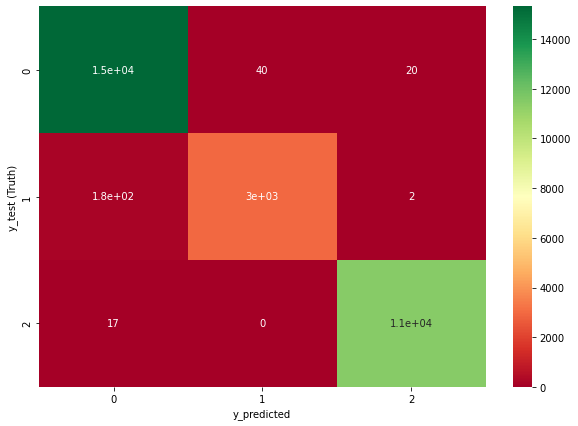

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,cmap="RdYlGn")
plt.xlabel('y_predicted')
plt.ylabel('y_test (Truth)')

### classification_report

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15379
           1       0.99      0.94      0.96      3153
           2       1.00      1.00      1.00     11468

    accuracy                           0.99     30000
   macro avg       0.99      0.98      0.98     30000
weighted avg       0.99      0.99      0.99     30000



 Since we achived very high accuracy from the first try, there is no need to further fine-tune the hyperparameter.

## Save the Model in a binary file


In [31]:
import pickle
# open a file, where you ant to store the data
file = open('model.pickle', 'wb')

# dump information to that file
pickle.dump(model, file)

# Summary

Based on the provided data in a form of a CSV file, the goal is to make a model which predicts classification of stellar objects - if it is a galaxy, star or quasi-stellar object. 
For detailed data discoveries Data Profiling was used. 
The Model works with 99% accuracy which was proved by three different methods.

